## Hoverboard Controller

The hoverboard firmware expects a value between -1000 to 1000 to set the speed of a wheel. Values between -49 and 49 are set to 0 in the code.

To test the firmware we run the code in test-firmware.py on the robot and pipe the output to the a file. A sample file is provided in test-firmware.log. No ground forces were applied when running the test.

We analyze the log file

In [12]:
import numpy as np
data = np.loadtxt("test-firmware.log")
columns = ['set_speed_r', 'set_speed_l', 'battery', 'current_r', 'current_l', 'speed_r', 'speed_l']
colmap = dict(zip(columns, range(len(columns))))

In [13]:
def get_stats(data, feedback):
    side = 'r'
    set_speeds = np.unique(data[:, colmap["set_speed_%s" % side]])
    for set_speed in set_speeds:
        s_max = data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]].max()
        s_min = data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]].min()
        s_av = np.average(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_med = np.median(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_std = np.std(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_values = np.unique(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_spread = len(s_values)
        print("set_speed_%s:%s min:%.2f max:%.2f average:%.2f median:%.2f deviation:%.2f spread:%s (%s)" % (side, int(set_speed), s_min, s_max, s_av, s_med, s_std, s_spread, s_values))

In [14]:
feedback = "speed_r"
get_stats(data, feedback)

set_speed_r:0 min:-0.00 max:-0.00 average:0.00 median:0.00 deviation:0.00 spread:1 ([-0.])
set_speed_r:100 min:12.77 max:15.21 average:13.78 median:13.73 deviation:0.49 spread:177 ([12.77 12.85 12.86 12.88 12.91 12.92 12.93 12.94 12.97 12.98 12.99 13.
 13.02 13.03 13.04 13.05 13.06 13.07 13.08 13.09 13.1  13.11 13.13 13.14
 13.15 13.16 13.17 13.18 13.19 13.2  13.21 13.22 13.23 13.25 13.26 13.27
 13.28 13.29 13.3  13.31 13.32 13.33 13.34 13.36 13.37 13.38 13.39 13.4
 13.41 13.42 13.43 13.45 13.46 13.47 13.48 13.49 13.5  13.51 13.52 13.54
 13.55 13.56 13.57 13.58 13.59 13.61 13.62 13.63 13.64 13.65 13.66 13.68
 13.69 13.7  13.71 13.72 13.73 13.75 13.76 13.77 13.78 13.79 13.81 13.82
 13.83 13.84 13.85 13.86 13.88 13.89 13.9  13.91 13.93 13.94 13.95 13.96
 13.97 13.99 14.   14.01 14.02 14.04 14.05 14.06 14.07 14.08 14.1  14.11
 14.12 14.13 14.15 14.16 14.17 14.18 14.2  14.21 14.22 14.23 14.25 14.26
 14.27 14.29 14.3  14.31 14.32 14.34 14.35 14.36 14.38 14.39 14.4  14.41
 14.43 14.44 14.45 

In [15]:
feedback = "speed_l"
get_stats(data, feedback)

set_speed_r:0 min:0.00 max:0.00 average:0.00 median:0.00 deviation:0.00 spread:1 ([0.])
set_speed_r:100 min:14.75 max:17.70 average:16.45 median:16.48 deviation:0.62 spread:166 ([14.75 14.77 14.83 14.84 14.86 14.87 14.88 14.9  14.93 14.95 14.97 15.
 15.02 15.04 15.05 15.07 15.08 15.09 15.11 15.12 15.14 15.15 15.17 15.18
 15.19 15.21 15.22 15.25 15.27 15.28 15.31 15.34 15.36 15.37 15.38 15.4
 15.41 15.43 15.44 15.46 15.47 15.49 15.5  15.52 15.55 15.56 15.61 15.62
 15.64 15.66 15.67 15.69 15.7  15.72 15.73 15.75 15.76 15.78 15.79 15.81
 15.83 15.84 15.86 15.87 15.89 15.9  15.92 15.94 15.95 15.97 15.98 16.
 16.02 16.03 16.05 16.06 16.08 16.1  16.11 16.13 16.15 16.16 16.18 16.19
 16.21 16.23 16.24 16.26 16.28 16.29 16.31 16.33 16.34 16.36 16.38 16.39
 16.41 16.43 16.44 16.46 16.48 16.49 16.51 16.53 16.55 16.56 16.58 16.6
 16.61 16.63 16.65 16.67 16.68 16.7  16.72 16.74 16.75 16.77 16.79 16.81
 16.82 16.84 16.86 16.88 16.9  16.91 16.93 16.95 16.97 16.99 17.   17.02
 17.04 17.06 17.09 17.11 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [17]:
def draw_feedback(data, max_spped, feedback1, feedback2):
    i = 0
    set_speeds = np.unique(data[:, colmap["set_speed_r"]])
    fig, axs = plt.subplots(len(set_speeds), 2,figsize=(15,10))
    for set_speed in set_speeds:
        for k in range(2):
            if k:
                feedback = feedback2
            else:
                feedback = feedback1
            y = data[data[:, colmap["set_speed_r"]] == set_speed][:, colmap[feedback]]
            x = range(len(y))
            axs[i, k].set_ylim([0, max_spped])
            axs[i, k].plot(x,y)
        i += 1

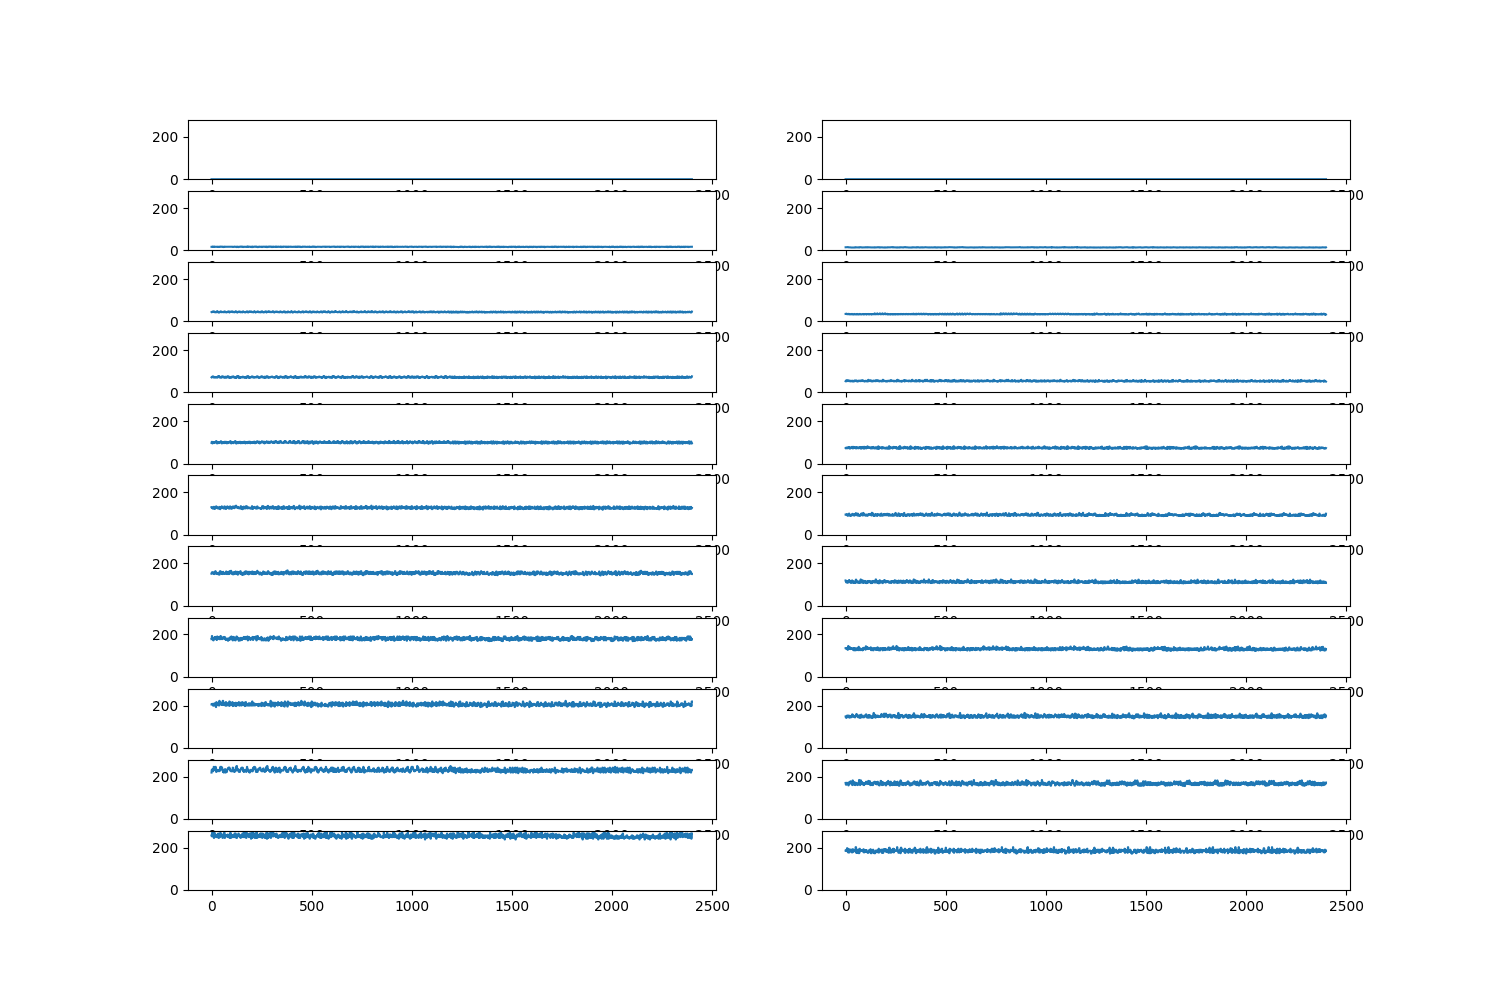

In [18]:
draw_feedback(data, 280, "speed_l", "speed_r")

### Observations
There are differences between the wheel. The speed set differs from the speed measured

The variation of feedback is also quite signigicant, in particular at a speed setting of 100. Since we want to move the robot at low speed we need to have a closer look.
For that we run test-firmware.py again but we modify the code to cover a range from 50 to 160 with a step size of 10

A sample log is in test-firmware-slow.log. No ground forces were applied when runnung the test.

In [19]:
data = np.loadtxt("test-firmware-slow.log")
columns = ['set_speed_r', 'set_speed_l', 'battery', 'current_r', 'current_l', 'speed_r', 'speed_l']
colmap = dict(zip(columns, range(len(columns))))

In [20]:
feedback = "speed_r"
get_stats(data, feedback)

set_speed_r:50 min:2.44 max:3.65 average:3.14 median:3.14 deviation:0.21 spread:105 ([2.44 2.55 2.56 2.57 2.58 2.62 2.64 2.65 2.67 2.68 2.69 2.7  2.72 2.73
 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81 2.82 2.83 2.84 2.85 2.86 2.87
 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01
 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15
 3.16 3.17 3.18 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29
 3.3  3.31 3.32 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43
 3.44 3.45 3.46 3.47 3.48 3.49 3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58
 3.59 3.6  3.61 3.62 3.63 3.64 3.65])
set_speed_r:60 min:4.54 max:6.01 average:5.33 median:5.31 deviation:0.24 spread:128 ([4.54 4.55 4.6  4.62 4.63 4.68 4.7  4.73 4.75 4.78 4.79 4.81 4.82 4.83
 4.84 4.85 4.86 4.87 4.88 4.89 4.9  4.91 4.92 4.93 4.94 4.95 4.96 4.97
 4.98 4.99 5.   5.01 5.02 5.03 5.04 5.05 5.06 5.07 5.08 5.09 5.1  5.11
 5.12 5.13 5.14 5.15 5.16 5.17 5.18 5.19 5.2  5.21 5.22 5.23 5.24 5.25
 5.26 5.27 

In [21]:
feedback = "speed_l"
get_stats(data, feedback)

set_speed_r:50 min:0.00 max:2.19 average:0.03 median:0.00 deviation:0.21 spread:9 ([0.   1.02 1.09 1.36 1.37 1.75 1.79 1.9  2.19])
set_speed_r:60 min:3.32 max:6.00 average:4.69 median:4.78 deviation:0.51 spread:209 ([3.32 3.39 3.43 3.49 3.51 3.54 3.57 3.58 3.59 3.6  3.61 3.62 3.63 3.64
 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.73 3.74 3.75 3.77 3.79 3.81
 3.82 3.83 3.84 3.86 3.87 3.88 3.89 3.9  3.91 3.92 3.93 3.94 3.95 3.96
 3.97 3.98 3.99 4.   4.01 4.02 4.03 4.04 4.05 4.06 4.07 4.08 4.09 4.1
 4.11 4.12 4.13 4.14 4.15 4.16 4.17 4.18 4.19 4.2  4.21 4.22 4.23 4.24
 4.25 4.26 4.27 4.28 4.29 4.3  4.31 4.32 4.33 4.34 4.35 4.36 4.37 4.38
 4.39 4.4  4.41 4.42 4.43 4.44 4.45 4.46 4.47 4.48 4.49 4.5  4.51 4.52
 4.53 4.54 4.55 4.56 4.57 4.58 4.6  4.61 4.62 4.63 4.64 4.65 4.66 4.67
 4.68 4.69 4.7  4.71 4.72 4.73 4.74 4.75 4.76 4.77 4.78 4.79 4.8  4.81
 4.82 4.83 4.84 4.85 4.86 4.87 4.88 4.89 4.9  4.91 4.92 4.93 4.94 4.95
 4.96 4.97 4.98 4.99 5.   5.01 5.02 5.03 5.04 5.05 5.06 5.07 5.08 5.09
 5.1

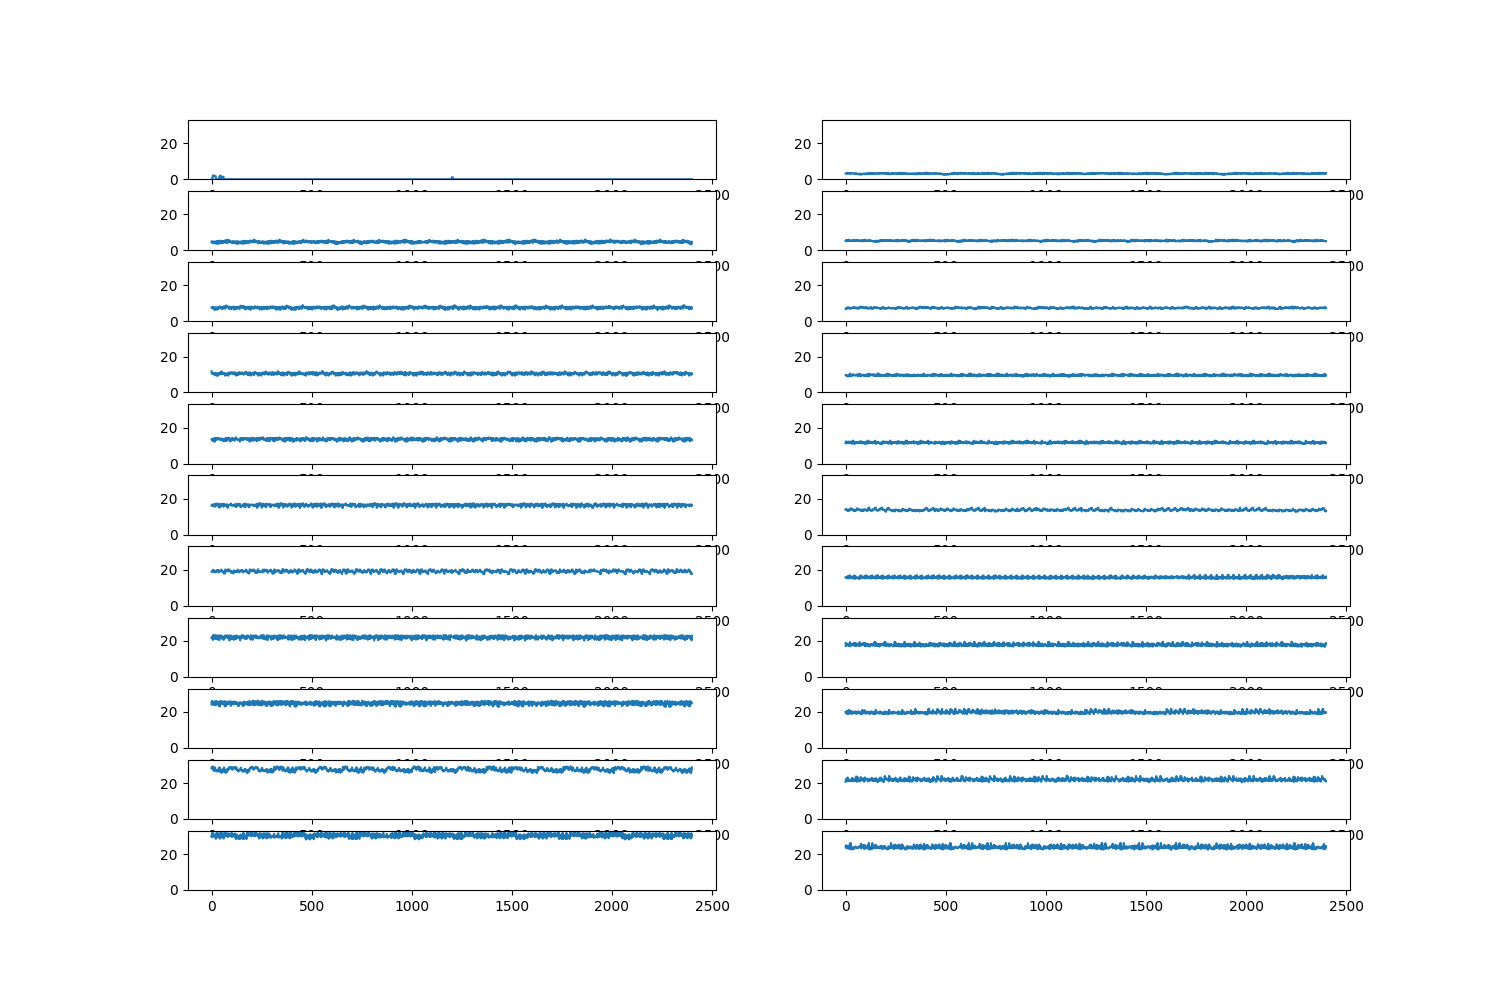

In [22]:
draw_feedback(data, 33, "speed_l", "speed_r")

### Firmware code

UART communication with the proxy is handled in commsSteering.c The speed for each wheel is stored in the global variables defied in main.c

    int32_t leftSpeed = 0;                                                                          // left speed setpoint (-1000,+1000)
    int32_t rightSpeed = 0;                                                                         // right speed setpoint (-1000,+1000)

These values are clamped as follows

    pwmSlave  =  leftSpeed < 50 &&  leftSpeed > -50 ? 0 : CLAMP( leftSpeed, -1000, 1000) * SPEED_COEFFICIENT;
    pwmMaster = rightSpeed < 50 && rightSpeed > -50 ? 0 : CLAMP(rightSpeed, -1000, 1000) * SPEED_COEFFICIENT;
    
where SPEED_COEFFICIENT is set to -1 in config.h

The values reported back to the proxy are:

    float realSpeed = 0.0;
    
and calculated as 

          // Increments with 62.5us
          if(loopCounter < 16000 && inc == 0) // Number of loops with no increment gives time
          {
                  loopCounter++;
          }
          else
          {
                  if (inc != last_inc)
                  {
                          last_inc = inc;
                          // Wait for direction to be determined in next loop
                  }
                  else
                  {
                          // Set and calculate velocity
                          realSpeed = (float)inc * 16000.0 / (float)loopCounter; // Ticks per Second
                          loopCounter = 0;
                  }
          }
      
in bldc.c
    


BLDC calculations are done in bldc.c

The functions are as flollows:

    //----------------------------------------------------------------------------
    // Block PWM calculation based on position
    //----------------------------------------------------------------------------
    void blockPWM(int pwm, int pwmPos, int *y, int *b, int *g)

    //----------------------------------------------------------------------------
    // Set motor enable
    //----------------------------------------------------------------------------
    void SetEnable(FlagStatus setEnable)

    //----------------------------------------------------------------------------
    // Set pwm -1000 to 1000
    //----------------------------------------------------------------------------
    void SetPWM(int16_t setPwm)

    //----------------------------------------------------------------------------
    // Calculation-Routine for BLDC => calculates with 16kHz
    //----------------------------------------------------------------------------
    void CalculateBLDC(void)

using the following commutation table:

    //----------------------------------------------------------------------------
    // Commutation table
    //----------------------------------------------------------------------------
    const uint8_t hall_to_pos[8] =
    {
            // annotation: for example SA=0 means hall sensor pulls SA down to Ground
      0, // hall position [-] - No function (access from 1-6)
      3, // hall position [1] (SA=1, SB=0, SC=0) -> PWM-position 3
      5, // hall position [2] (SA=0, SB=1, SC=0) -> PWM-position 5
      4, // hall position [3] (SA=1, SB=1, SC=0) -> PWM-position 4
      1, // hall position [4] (SA=0, SB=0, SC=1) -> PWM-position 1
      2, // hall position [5] (SA=1, SB=0, SC=1) -> PWM-position 2
      6, // hall position [6] (SA=0, SB=1, SC=1) -> PWM-position 6
      0, // hall position [-] - No function (access from 1-6)
    };